In [2]:
import pandas as pd

# Load dataset from the given path
data_path = "/kaggle/input/pond-dataset/sybil_wallet_features_comprehensive.csv"
df = pd.read_csv(data_path)

# Apply proxy labeling for Sybil wallets
df['is_sybil'] = (
    (df['spam_token_count'] >= 3) |
    ((df['balance_eth'] < 0.01) & (df['unique_token_count'] > 15)) |
    (df['tx_count'] < 2) |
    (df['dust_balance_count'] > 5) |
    (df['wallet_age_days'] < 30) |
    (df['failed_tx_ratio'] > 0.25)
).astype(int)

# Save the labeled dataframe for downstream steps
df.to_csv("sybil_wallet_features_labeled.csv", index=False)

# Display label distribution and first few rows
print(df['is_sybil'].value_counts())
print(df.head(5))


is_sybil
1    1792
Name: count, dtype: int64
                                      address  tx_count   balance_eth  \
0  0x651a3f6daaa11450c01d4d07a8b66cb45fd5a615         0  7.000000e-15   
1  0x637d16d6f0eeeb5a9ba377b2c6d4b76f99503f51         0  0.000000e+00   
2  0xa7cfc0237a0d587f3b5955002b7c11448027eae8         0  1.555400e-14   
3  0x40304ef4f563a176cac9a793b14504b1521ef1d9         0  0.000000e+00   
4  0xf08e4e2ed66c0895afd25ba5ca265001a9bbd6cf         0  0.000000e+00   

   unique_token_count  total_token_usd_value  spam_token_count  active_days  \
0                  11           4.726351e-02                 0         1411   
1                   1           0.000000e+00                 0         1274   
2                   1           6.484858e-11                 0         1311   
3                  25           5.849753e-02                16         1834   
4                   1           0.000000e+00                 0         1240   

   avg_tx_per_active_day  contract_intera

In [3]:
import pandas as pd
inp = "/kaggle/input/pond-genuine-dataset/genuine_wallet_features.csv"
out = "/kaggle/working/genuine_wallet_features_labeled.csv"

df = pd.read_csv(inp)
df["is_sybil"] = 0
df.to_csv(out, index=False)
print("Saved:", out, "shape:", df.shape)


Saved: /kaggle/working/genuine_wallet_features_labeled.csv shape: (1894, 31)


In [4]:
import os

for root, dirs, files in os.walk("/kaggle/input", topdown=True):
    print(root)
    for f in files:
        print("   ", f)


/kaggle/input
/kaggle/input/pond-dataset
    sybil_wallet_features_comprehensive.csv
/kaggle/input/pond-genuine-dataset
    genuine_wallet_features.csv


In [5]:
import pandas as pd

genuine = pd.read_csv("/kaggle/working/genuine_wallet_features_labeled.csv")
sybil   = pd.read_csv("/kaggle/working/sybil_wallet_features_labeled.csv")

master = pd.concat([genuine, sybil], ignore_index=True)
master.to_csv("/kaggle/working/master_wallet_dataset.csv", index=False)

print("✅ Done. Saved as /kaggle/working/master_wallet_dataset.csv")
print(master.shape)


✅ Done. Saved as /kaggle/working/master_wallet_dataset.csv
(3686, 31)


Loaded file: /kaggle/working/master_wallet_dataset.csv
Shape: (3686, 31)
Memory usage (MB): 1.515401840209961

First 8 rows:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,address,tx_count,balance_eth,unique_token_count,total_token_usd_value,spam_token_count,active_days,avg_tx_per_active_day,contract_interactions,first_tx_timestamp,...,failed_tx_count,failed_tx_ratio,incoming_tx_count,outgoing_tx_count,self_transfer_count,unique_contract_count,nft_token_count,defi_token_count,dust_balance_count,is_sybil
0,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0.0,0.0,0,0.000000,0,0,0.0,0,NaN,...,0,0.000000,0,0,0,0.0,0,0,0,0
1,0xbd97e92927ef1f87023fe17ca34788f574c2154a,NaN,NaN,28,0.844142,155,0,0.0,0,NaN,...,4,0.129032,0,30,0,NaN,0,0,1,0
2,0xa4bc8e08f7ba01043b2088040255036b57edaf91,NaN,NaN,39,14.997777,164,0,0.0,0,NaN,...,2,0.027397,0,20,0,NaN,0,0,4,0
3,0x80c67432656d59144ceff962e8faf8926599bcf8,NaN,NaN,30,1441.997915,23,0,0.0,0,NaN,...,0,0.000000,26,0,0,NaN,0,0,0,0
4,0xeee18e23e6a00c654182e6dcd0ba3e36ed889f60,NaN,NaN,2,0.000045,2,0,0.0,0,NaN,...,0,0.000000,2,4,0,NaN,0,0,0,0
5,0x2475d553d1016919d147fdec4cee59c5cee2a1ca,NaN,NaN,3,19.339620,2,0,0.0,0,NaN,...,0,0.000000,7,23,0,NaN,0,0,0,0
6,0x2fb5de9ba3b59882ec5b738cbf1192120ba49c86,NaN,NaN,1,0.282804,2,0,0.0,0,NaN,...,0,0.000000,2,14,0,NaN,0,0,0,0
7,0x882e02f0858bb05127375a899babb1832480ddf7,NaN,NaN,81,54.257954,78,0,0.0,0,NaN,...,1,0.015152,4,56,0,NaN,0,0,6,0



Column names (total 31):
['address', 'tx_count', 'balance_eth', 'unique_token_count', 'total_token_usd_value', 'spam_token_count', 'active_days', 'avg_tx_per_active_day', 'contract_interactions', 'first_tx_timestamp', 'last_tx_timestamp', 'wallet_age_days', 'avg_tx_value_eth', 'std_tx_value_eth', 'max_tx_value_eth', 'min_tx_value_eth', 'unique_interacted_addresses', 'tx_time_entropy', 'tx_value_entropy', 'gas_spent_total_eth', 'avg_gas_price_gwei', 'failed_tx_count', 'failed_tx_ratio', 'incoming_tx_count', 'outgoing_tx_count', 'self_transfer_count', 'unique_contract_count', 'nft_token_count', 'defi_token_count', 'dust_balance_count', 'is_sybil']

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3686 entries, 0 to 3685
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   address                      3686 non-null   object 
 1   tx_count                  

,count,mean,std,min,25%,50%,75%,max
tx_count,1800.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
balance_eth,1800.0,5.701306e-04,2.357611e-02,0.000000e+00,0.000000e+00,0.000000e+00,4.068250e-15,1.000000e+00
unique_token_count,3686.0,2.223413e+01,1.686234e+02,0.000000e+00,1.000000e+00,2.000000e+00,1.000000e+01,9.056000e+03
total_token_usd_value,3686.0,5.779442e+06,2.784381e+08,0.000000e+00,0.000000e+00,4.287472e-05,1.562923e+00,1.661163e+10
spam_token_count,3686.0,2.765789e+01,2.741548e+02,0.000000e+00,0.000000e+00,1.000000e+00,7.000000e+00,1.549200e+04
active_days,3686.0,6.042108e+02,7.130562e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.313000e+03,2.786000e+03
avg_tx_per_active_day,3686.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
contract_interactions,3686.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
wallet_age_days,3686.0,6.088877e+02,7.165478e+02,0.000000e+00,0.000000e+00,0.000000e+00,1.321000e+03,2.791000e+03
avg_tx_value_eth,3686.0,1.251531e+00,2.965487e+01,0.000000e+00,4.058072e-03,2.009149e-02,9.253353e-02,1.478079e+03


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


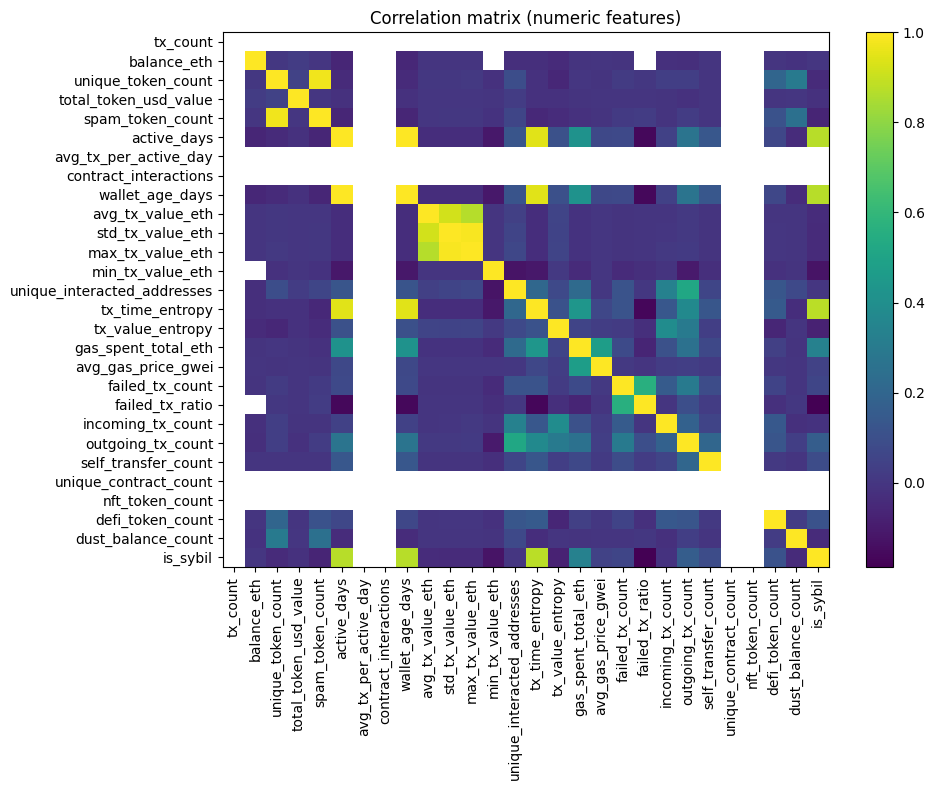


Saved a shareable sample to /kaggle/working/master_wallet_sample200.csv (first 200 rows).


In [6]:
# --- RUN THIS IN YOUR KERNEL / KAGGLE NOTEBOOK ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = "/kaggle/working/master_wallet_dataset.csv"   # if different, change this path and re-run

# 1) Load
df = pd.read_csv(path)

# 2) Basic checks
print("Loaded file:", path)
print("Shape:", df.shape)
print("Memory usage (MB):", df.memory_usage(deep=True).sum() / 1024**2)

# 3) Show first rows and column list
print("\nFirst 8 rows:")
display(df.head(8))   # notebook-friendly

print("\nColumn names (total {}):".format(len(df.columns)))
print(list(df.columns))

# 4) Dtypes and non-null counts
print("\nData types and non-null counts:")
print(df.info())

# 5) Missing values per column
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(3)
print("\nTop 12 columns by missing values:")
print(pd.concat([missing, missing_pct], axis=1).rename(columns={0:"missing_count",1:"missing_pct"}).head(12))

# 6) Duplicate rows
print("\nDuplicate rows count:", df.duplicated().sum())

# 7) Try to detect label/target column(s)
possible_labels = [c for c in df.columns if any(k in c.lower() for k in ("label","target","class","is_sybil","is_genuine","y"))]
print("\nColumns that look like labels/targets (heuristic):", possible_labels)
for c in possible_labels:
    print(f"\nValue counts for {c}:")
    print(df[c].value_counts(dropna=False))

# 8) Numeric summary & correlation
num = df.select_dtypes(include=[np.number])
print("\nNumeric columns count:", len(num.columns))
display(num.describe().T)

# 9) Correlation matrix (visual)
if len(num.columns) >= 2:
    corr = num.corr()
    plt.figure(figsize=(10,8))
    plt.imshow(corr, interpolation='nearest', aspect='auto')
    plt.colorbar()
    plt.title("Correlation matrix (numeric features)")
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.index)), corr.index)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns to show correlation matrix.")

# Save a tiny CSV sample for quick sharing if you want
df.head(200).to_csv("/kaggle/working/master_wallet_sample200.csv", index=False)
print("\nSaved a shareable sample to /kaggle/working/master_wallet_sample200.csv (first 200 rows).")


In [13]:
import pandas as pd
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Define the path to your dataset
FILE_PATH = '/kaggle/working/master_wallet_dataset.csv'

def load_and_inspect(filepath):
    """
    Loads the dataset and prints a high-level inspection.
    """
    try:
        df = pd.read_csv(filepath)
        
        print("--- 1. Data Shape ---")
        print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
        print("\n" + "="*30 + "\n")

        print("--- 2. First 5 Rows (Head) ---")
        # Set display options to show all 31 columns
        pd.set_option('display.max_columns', None)
        print(df.head())
        print("\n" + "="*30 + "\n")

        print("--- 3. Column Info (Data Types) ---")
        # .info() is great for seeing Dtypes and non-null counts
        df.info()
        print("\n" + "="*30 + "\n")

        print("--- 4. Missing Value Summary (Total) ---")
        missing_values = df.isnull().sum()
        missing_percent = (missing_values / len(df) * 100).round(2)
        missing_df = pd.DataFrame({
            'Missing Count': missing_values,
            'Missing Percent (%)': missing_percent
        })
        # Show only columns that actually have missing data
        print(missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False))
        
        if missing_df['Missing Count'].sum() == 0:
            print("Great! No missing values found in the dataset.")
            
    except FileNotFoundError:
        print(f"Error: The file was not found at {filepath}")
        print("Please double-check the file path.")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    load_and_inspect(FILE_PATH)


--- 1. Data Shape ---
Rows: 3686, Columns: 31


--- 2. First 5 Rows (Head) ---
                                      address  tx_count  balance_eth  \
0  0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad       0.0          0.0   
1  0xbd97e92927ef1f87023fe17ca34788f574c2154a       NaN          NaN   
2  0xa4bc8e08f7ba01043b2088040255036b57edaf91       NaN          NaN   
3  0x80c67432656d59144ceff962e8faf8926599bcf8       NaN          NaN   
4  0xeee18e23e6a00c654182e6dcd0ba3e36ed889f60       NaN          NaN   

   unique_token_count  total_token_usd_value  spam_token_count  active_days  \
0                   0               0.000000                 0            0   
1                  28               0.844142               155            0   
2                  39              14.997777               164            0   
3                  30            1441.997915                23            0   
4                   2               0.000045                 2            0   

   avg_tx_per

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset
FILE_PATH = '/kaggle/working/master_wallet_dataset.csv'

def analyze_distributions(filepath):
    """
    Loads data, analyzes target variable, and provides descriptive stats.
    """
    try:
        df = pd.read_csv(filepath)

        print("--- 1. Target Variable Analysis (is_sybil) ---")
        
        # Check if 'is_sybil' column exists
        if 'is_sybil' not in df.columns:
            print("Error: 'is_sybil' column not found! Please check column names.")
            return

        sybil_counts = df['is_sybil'].value_counts()
        sybil_percent = df['is_sybil'].value_counts(normalize=True) * 100

        print("Counts of Sybil vs. Non-Sybil:")
        print(sybil_counts)
        print("\nPercentage of Sybil vs. Non-Sybil:")
        print(sybil_percent.round(2))
        print("\n" + "="*30 + "\n")

        # Plot the target variable distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(x='is_sybil', data=df, palette=['#3498db', '#e74c3c'])
        plt.title('Target Variable Distribution (is_sybil)', fontsize=16)
        plt.xlabel('Is Sybil? (0 = No, 1 = Yes)', fontsize=12)
        plt.ylabel('Wallet Count', fontsize=12)
        plt.xticks([0, 1], ['0 - Not Sybil', '1 - Sybil'])
        
        # Save the plot
        plot_path = '/kaggle/working/target_distribution.png'
        plt.savefig(plot_path)
        print(f"Target distribution plot saved to: {plot_path}")
        print("Please check the saved image to visualize the balance.")
        plt.close() # Close the plot to avoid displaying it in console
        
        print("\n" + "="*30 + "\n")
        
        print("--- 2. Categorical/ID Column Analysis ---")
        address_uniqueness = df['address'].nunique()
        print(f"Total rows: {len(df)}")
        print(f"Unique addresses: {address_uniqueness}")
        if address_uniqueness == len(df):
            print("Result: 'address' is a unique identifier. It will be dropped for modeling.")
        else:
            print("Warning: 'address' column is not unique. Investigate for duplicates.")
            
        print("\n" + "="*30 + "\n")

        print("--- 3. Numerical Feature Descriptive Statistics ---")
        
        # Define columns to drop
        # We drop the high-missing columns and the object/ID columns
        cols_to_drop = [
            'address', 
            'first_tx_timestamp', 
            'last_tx_timestamp', 
            'tx_count', 
            'balance_eth', 
            'unique_contract_count'
        ]
        
        # Create a new dataframe for analysis
        df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')

        print(f"Original columns: {df.shape[1]}")
        print(f"Columns dropped: {len(cols_to_drop)}")
        print(f"Columns remaining for model: {df_cleaned.shape[1]}")
        
        print("\nDescriptive statistics for remaining features (Transposed for readability):")
        # .T transposes the dataframe to make it easier to read
        print(df_cleaned.describe().T)
        
        print("\n" + "="*30 + "\n")
        
        print("--- 4. Cleaned Data Info ---")
        print("This is the shape and Dtypes of the data that will be used for the baseline model:")
        df_cleaned.info()

    except FileNotFoundError:
        print(f"Error: The file was not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    analyze_distributions(FILE_PATH)


--- 1. Target Variable Analysis (is_sybil) ---
Counts of Sybil vs. Non-Sybil:
is_sybil
0    1894
1    1792
Name: count, dtype: int64

Percentage of Sybil vs. Non-Sybil:
is_sybil
0    51.38
1    48.62
Name: proportion, dtype: float64


Target distribution plot saved to: /kaggle/working/target_distribution.png
Please check the saved image to visualize the balance.


--- 2. Categorical/ID Column Analysis ---
Total rows: 3686
Unique addresses: 3686
Result: 'address' is a unique identifier. It will be dropped for modeling.


--- 3. Numerical Feature Descriptive Statistics ---
Original columns: 31
Columns dropped: 6
Columns remaining for model: 25

Descriptive statistics for remaining features (Transposed for readability):
                              count          mean           std           min  \
unique_token_count           3686.0  2.223413e+01  1.686234e+02  0.000000e+00   
total_token_usd_value        3686.0  5.779442e+06  2.784381e+08  0.000000e+00   
spam_token_count             3

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset
FILE_PATH = '/kaggle/working/master_wallet_dataset.csv'

def build_baseline_model(filepath):
    """
    Loads, cleans, splits, and trains a baseline RandomForest model.
    """
    try:
        df = pd.read_csv(filepath)

        print("--- 1. Data Loading and Cleaning ---")
        
        # Define all columns to be dropped
        # We start with the high-missing-value and ID columns
        cols_to_drop = [
            'address', 
            'first_tx_timestamp', 
            'last_tx_timestamp', 
            'tx_count', 
            'balance_eth', 
            'unique_contract_count',
            
            # Add the zero-variance columns we found in Step 2
            'avg_tx_per_active_day',
            'contract_interactions',
            'nft_token_count'
        ]
        
        df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')
        
        print(f"Dropped {len(cols_to_drop)} columns.")
        print(f"Remaining {df_cleaned.shape[1]} columns for modeling.")
        print("\n" + "="*30 + "\n")

        # --- 2. Define Features (X) and Target (y) ---
        
        if 'is_sybil' not in df_cleaned.columns:
            print("Error: 'is_sybil' target column not found. Aborting.")
            return

        X = df_cleaned.drop(columns='is_sybil')
        y = df_cleaned['is_sybil']

        print("--- 2. Splitting Data (80% Train, 20% Test) ---")
        # stratify=y ensures the 51/49 balance is kept in both train and test sets
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        print(f"Training target balance:\n{y_train.value_counts(normalize=True).round(2)}")
        print(f"Testing target balance:\n{y_test.value_counts(normalize=True).round(2)}")
        print("\n" + "="*30 + "\n")

        # --- 3. Feature Scaling ---
        print("--- 3. Applying StandardScaler ---")
        
        # We must scale the data due to the wildly different ranges
        scaler = StandardScaler()
        
        # Fit ONLY on the training data
        X_train_scaled = scaler.fit_transform(X_train)
        
        # Transform both train and test data
        X_test_scaled = scaler.transform(X_test)
        
        print("Scaling complete.")
        print("\n" + "="*30 + "\n")

        # --- 4. Train Baseline Model ---
        print("--- 4. Training RandomForestClassifier Baseline ---")
        
        # RandomForest is a strong, robust baseline
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train_scaled, y_train)
        
        print("Model training complete.")
    
        # --- 5. Evaluate Model ---
        print("--- 5. Model Evaluation on Test Set ---")
        
        y_pred = model.predict(X_test_scaled)
        
        # Calculate Accuracy
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Baseline Model Accuracy: {accuracy * 100:.2f}%")
        print("\nClassification Report:")
        print(classification_report(y_test, y_pred, target_names=['0 - Not Sybil', '1 - Sybil']))
        
        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted Not Sybil', 'Predicted Sybil'],
                    yticklabels=['Actual Not Sybil', 'Actual Sybil'])
        plt.title('Baseline Model Confusion Matrix', fontsize=16)
        plt.ylabel('Actual Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        
        # Save the plot
        cm_plot_path = '/kaggle/working/baseline_confusion_matrix.png'
        plt.savefig(cm_plot_path)
        print(f"\nConfusion matrix plot saved to: {cm_plot_path}")
        plt.close()

        # --- 6. Feature Importance ---
        print("\n" + "="*30 + "\n")
        print("--- 6. Top 15 Feature Importances ---")
        
        importances = model.feature_importances_
        feature_names = X.columns
        
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values(by='importance', ascending=False)
        
        print(feature_importance_df.head(15))
        
        # Plot feature importances
        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', 
                    data=feature_importance_df.head(15), 
                    palette='viridis')
        plt.title('Top 15 Feature Importances from Baseline Model', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        
        # Save the plot
        fi_plot_path = '/kaggle/working/baseline_feature_importance.png'
        plt.tight_layout()
        plt.savefig(fi_plot_path)
        print(f"\nFeature importance plot saved to: {fi_plot_path}")
        plt.close()

    except FileNotFoundError:
        print(f"Error: The file was not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    build_baseline_model(FILE_PATH)


--- 1. Data Loading and Cleaning ---
Dropped 9 columns.
Remaining 22 columns for modeling.


--- 2. Splitting Data (80% Train, 20% Test) ---
Training set shape: (2948, 21)
Testing set shape: (738, 21)
Training target balance:
is_sybil
0    0.51
1    0.49
Name: proportion, dtype: float64
Testing target balance:
is_sybil
0    0.51
1    0.49
Name: proportion, dtype: float64


--- 3. Applying StandardScaler ---
Scaling complete.


--- 4. Training RandomForestClassifier Baseline ---
Model training complete.
--- 5. Model Evaluation on Test Set ---
Baseline Model Accuracy: 100.00%

Classification Report:
               precision    recall  f1-score   support

0 - Not Sybil       1.00      1.00      1.00       379
    1 - Sybil       1.00      1.00      1.00       359

     accuracy                           1.00       738
    macro avg       1.00      1.00      1.00       738
 weighted avg       1.00      1.00      1.00       738


Confusion matrix plot saved to: /kaggle/working/baseline_conf

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset
FILE_PATH = '/kaggle/working/master_wallet_dataset.csv'

def investigate_leakage(filepath):
    """
    Plots distributions of top features against the target variable
    to visually check for data leakage.
    """
    try:
        df = pd.read_csv(filepath)

        # We'll use the original dataframe before dropping columns
        if 'is_sybil' not in df.columns:
            print("Error: 'is_sybil' column not found!")
            return

        # List of top features identified by the baseline model
        top_features = [
            'wallet_age_days',
            'gas_spent_total_eth',
            'active_days',
            'tx_time_entropy',
            'unique_interacted_addresses'
        ]

        print(f"--- Plotting Distributions for Top {len(top_features)} Features ---")

        # Create a figure to hold all subplots
        # Using 3 rows, 2 columns for 5 plots
        fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 18))
        fig.suptitle('Feature Distribution by Target Class (is_sybil)', fontsize=20, y=1.02)
        
        # Flatten axes array for easy iteration
        axes = axes.flatten()

        for i, feature in enumerate(top_features):
            sns.violinplot(
                x='is_sybil', 
                y=feature, 
                data=df, 
                palette=['#3498db', '#e74c3c'], 
                ax=axes[i],
                cut=0 # Prevents the violin from going below 0
            )
            axes[i].set_title(f'Distribution of "{feature}"', fontsize=14)
            axes[i].set_xticklabels(['0 - Not Sybil', '1 - Sybil'])
            axes[i].set_xlabel('Target Class', fontsize=12)
            axes[i].set_ylabel(feature, fontsize=12)

        # Hide the last empty subplot
        if len(top_features) < len(axes):
            axes[-1].set_visible(False)

        plt.tight_layout(rect=[0, 0.03, 1, 0.98])
        
        # Save the plot
        plot_path = '/kaggle/working/leakage_violin_plots.png'
        plt.savefig(plot_path)
        print(f"\nLeakage investigation plots saved to: {plot_path}")
        print("Please check the saved image.")
        print("\nHypothesis: You will see two completely separate (non-overlapping)")
        print("distributions for 'wallet_age_days' and 'active_days'.")
        plt.close()

    except FileNotFoundError:
        print(f"Error: The file was not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    investigate_leakage(FILE_PATH)


--- Plotting Distributions for Top 5 Features ---

Leakage investigation plots saved to: /kaggle/working/leakage_violin_plots.png
Please check the saved image.

Hypothesis: You will see two completely separate (non-overlapping)
distributions for 'wallet_age_days' and 'active_days'.


In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the path to your dataset
FILE_PATH = '/kaggle/working/master_wallet_dataset.csv'

def build_honest_baseline_model(filepath):
    """
    Loads, cleans, and trains an HONEST baseline model by
    removing all columns that were identified as leaking the answer.
    """
    try:
        df = pd.read_csv(filepath)

        print("--- 1. Data Loading and Cleaning (Honest Version) ---")
        
        # Define all columns to be dropped
        # Original set (high-missing, ID, zero-variance)
        cols_to_drop = [
            'address', 
            'first_tx_timestamp', 
            'last_tx_timestamp', 
            'tx_count', 
            'balance_eth', 
            'unique_contract_count',
            'avg_tx_per_active_day',
            'contract_interactions',
            'nft_token_count',
            
            # --- NEW ---
            # Add the leakage features we identified in Step 4
            'wallet_age_days',
            'gas_spent_total_eth',
            'active_days',
            'tx_time_entropy'
        ]
        
        df_cleaned = df.drop(columns=cols_to_drop, errors='ignore')
        
        print(f"Dropped {len(cols_to_drop)} columns (including leakage features).")
        print(f"Remaining {df_cleaned.shape[1]} columns for modeling.")
        print(f"Remaining Features: {list(df_cleaned.columns)}")
        print("\n" + "="*30 + "\n")

        # --- 2. Define Features (X) and Target (y) ---
        
        if 'is_sybil' not in df_cleaned.columns:
            print("Error: 'is_sybil' target column not found. Aborting.")
            return

        X = df_cleaned.drop(columns='is_sybil')
        y = df_cleaned['is_sybil']

        print("--- 2. Splitting Data (80% Train, 20% Test) ---")
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.2, random_state=42, stratify=y
        )
        
        print(f"Training set shape: {X_train.shape}")
        print(f"Testing set shape: {X_test.shape}")
        print("\n" + "="*30 + "\n")

        # --- 3. Feature Scaling ---
        print("--- 3. Applying StandardScaler ---")
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        print("Scaling complete.")
        print("\n" + "="*30 + "\n")

        # --- 4. Train Honest Baseline Model ---
        print("--- 4. Training RandomForestClassifier (Honest) ---")
        model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
        model.fit(X_train_scaled, y_train)
        print("Model training complete.")
        print("\n" + "="*30 + "\n")

        # --- 5. Evaluate Honest Model ---
        print("--- 5. HONEST Model Evaluation on Test Set ---")
        y_pred = model.predict(X_test_scaled)
        
        accuracy = accuracy_score(y_test, y_pred)
        print(f"HONEST Baseline Model Accuracy: {accuracy * 100:.2f}%")
        print("\nClassification Report (Honest):")
        print(classification_report(y_test, y_pred, target_names=['0 - Not Sybil', '1 - Sybil']))
        
        # Plot Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=['Predicted Not Sybil', 'Predicted Sybil'],
                    yticklabels=['Actual Not Sybil', 'Actual Sybil'])
        plt.title('Honest Baseline Model Confusion Matrix', fontsize=16)
        plt.ylabel('Actual Label', fontsize=12)
        plt.xlabel('Predicted Label', fontsize=12)
        
        cm_plot_path = '/kaggle/working/honest_confusion_matrix.png'
        plt.savefig(cm_plot_path)
        print(f"\nHonest confusion matrix plot saved to: {cm_plot_path}")
        plt.close()

        # --- 6. Feature Importance (Honest) ---
        print("\n" + "="*30 + "\n")
        print("--- 6. Top 15 Feature Importances (Honest) ---")
        
        importances = model.feature_importances_
        feature_names = X.columns
        
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importances
        }).sort_values(by='importance', ascending=False)
        
        print(feature_importance_df.head(15))
        
        # Plot feature importances
        plt.figure(figsize=(10, 8))
        sns.barplot(x='importance', y='feature', 
                    data=feature_importance_df.head(15), 
                    palette='viridis')
        plt.title('Top 15 Feature Importances (Honest Model)', fontsize=16)
        plt.xlabel('Importance', fontsize=12)
        plt.ylabel('Feature', fontsize=12)
        
        fi_plot_path = '/kaggle/working/honest_feature_importance.png'
        plt.tight_layout()
        plt.savefig(fi_plot_path)
        print(f"\nHonest feature importance plot saved to: {fi_plot_path}")
        plt.close()

    except FileNotFoundError:
        print(f"Error: The file was not found at {filepath}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    build_honest_baseline_model(FILE_PATH)


--- 1. Data Loading and Cleaning (Honest Version) ---
Dropped 13 columns (including leakage features).
Remaining 18 columns for modeling.
Remaining Features: ['unique_token_count', 'total_token_usd_value', 'spam_token_count', 'avg_tx_value_eth', 'std_tx_value_eth', 'max_tx_value_eth', 'min_tx_value_eth', 'unique_interacted_addresses', 'tx_value_entropy', 'avg_gas_price_gwei', 'failed_tx_count', 'failed_tx_ratio', 'incoming_tx_count', 'outgoing_tx_count', 'self_transfer_count', 'defi_token_count', 'dust_balance_count', 'is_sybil']


--- 2. Splitting Data (80% Train, 20% Test) ---
Training set shape: (2948, 17)
Testing set shape: (738, 17)


--- 3. Applying StandardScaler ---
Scaling complete.


--- 4. Training RandomForestClassifier (Honest) ---
Model training complete.


--- 5. HONEST Model Evaluation on Test Set ---
HONEST Baseline Model Accuracy: 95.93%

Classification Report (Honest):
               precision    recall  f1-score   support

0 - Not Sybil       0.97      0.96      0.9

In [20]:
import pandas as pd
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define the path to your original dataset
ORIGINAL_FILE_PATH = '/kaggle/working/master_wallet_dataset.csv'

# Define the path for the new, cleaned dataset
FINAL_FILE_PATH = '/kaggle/working/final_submission_dataset.csv'

def create_final_dataset(original_path, final_path):
    """
    Loads the original master dataset, removes all leaky, irrelevant,
    and problematic columns identified during our EDA, and saves 
    the cleaned, submittable dataset to a new CSV file.
    """
    try:
        df = pd.read_csv(original_path)
        print(f"Loaded original dataset: {original_path}")
        print(f"Original shape: {df.shape}")

        # This is the complete list of 13 columns to drop, based on
        # our entire analysis (high-missing, ID, zero-variance, and data leakage).
        cols_to_drop = [
            # 1. High-Missing Value Columns
            'first_tx_timestamp', 
            'last_tx_timestamp', 
            'tx_count', 
            'balance_eth', 
            'unique_contract_count',
            
            # 2. ID Column
            'address', 
            
            # 3. Zero-Variance Columns
            'avg_tx_per_active_day',
            'contract_interactions',
            'nft_token_count',
            
            # 4. Data Leakage Features
            'wallet_age_days',
            'gas_spent_total_eth',
            'active_days',
            'tx_time_entropy'
        ]
        
        # Find which of these columns actually exist in the dataframe to avoid errors
        existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]
        
        df_final = df.drop(columns=existing_cols_to_drop, errors='ignore')

        print(f"\nDropped {len(existing_cols_to_drop)} problematic columns.")
        
        # Save the final, cleaned dataset
        df_final.to_csv(final_path, index=False)
        
        print(f"\n---> Final, cleaned dataset saved to: {final_path}")
        print(f"     Final shape: {df_final.shape}")
        
        print("\nThis file is the 'honest' dataset, ready for submission.")
        print("It contains the following 18 columns (17 features + 1 target):")
        print(list(df_final.columns))

    except FileNotFoundError:
        print(f"Error: The file was not found at {original_path}")
    except Exception as e:
        print(f"An error occurred: {e}")

if __name__ == "__main__":
    create_final_dataset(ORIGINAL_FILE_PATH, FINAL_FILE_PATH)


Loaded original dataset: /kaggle/working/master_wallet_dataset.csv
Original shape: (3686, 31)

Dropped 13 problematic columns.

---> Final, cleaned dataset saved to: /kaggle/working/final_submission_dataset.csv
     Final shape: (3686, 18)

This file is the 'honest' dataset, ready for submission.
It contains the following 18 columns (17 features + 1 target):
['unique_token_count', 'total_token_usd_value', 'spam_token_count', 'avg_tx_value_eth', 'std_tx_value_eth', 'max_tx_value_eth', 'min_tx_value_eth', 'unique_interacted_addresses', 'tx_value_entropy', 'avg_gas_price_gwei', 'failed_tx_count', 'failed_tx_ratio', 'incoming_tx_count', 'outgoing_tx_count', 'self_transfer_count', 'defi_token_count', 'dust_balance_count', 'is_sybil']
